# Exploração dos dados

### Introdução
Este estudo tem como objetivo desenvolver e avaliar modelos de classificação para prever a ocorrência de diabetes com base em variáveis clínicas. Nesta etapa inicial, realizamos uma análise exploratória dos dados para compreender suas características e embasar as decisões de pré-processamento.

### Import das bibliotecas e carregamento do dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (8,5)

### Carrega o dataset original

In [ ]:
dataset = pd.read_csv("../dados/Raw/diabetes.csv")

print("Dimensões do dataset:", dataset.shape)

Dimensões do dataset: (768, 9)


### Validar as informações do dataset

In [ ]:
print("Visualização inicial")
dataset.head()

Visualização inicial


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("\nInformações do dataset:")
dataset.info()



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print("\nValores ausentes:")
dataset.isna().sum()


Valores ausentes:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Observa-se que o conjunto possui 768 registros e 9 variáveis, sem valores ausentes explícitos.

In [ ]:
print("\nEstatísticas descritivas:")
dataset.describe()


Estatísticas descritivas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Validar as colunas com valor = 0 || NaN

Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


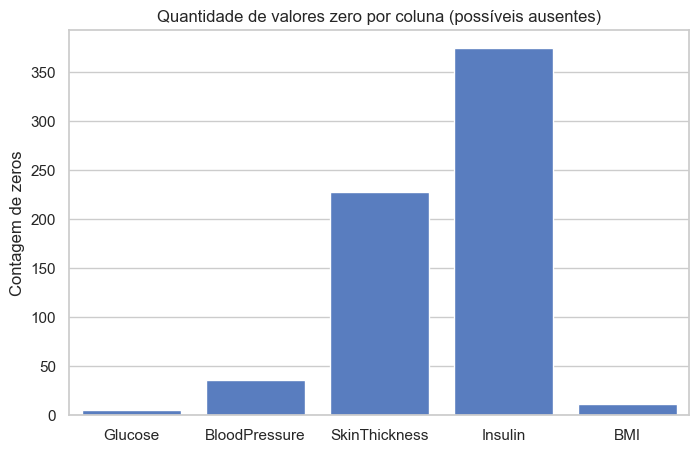

In [ ]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    zeros = (dataset[col] == 0).sum()
    print(f"{col}: {zeros} zeros")

# Visualização do impacto
sns.barplot(x=zero_cols, y=[(dataset[c]==0).sum() for c in zero_cols])
plt.title("Quantidade de valores zero por coluna (possíveis ausentes)")
plt.ylabel("Contagem de zeros")
plt.show()

Verifica-se que colunas Glucose, BloodPressure, SkinThickness, Isulin e BMI (Com destaque para Insulin) contêm valores iguais a zero, o que não é fisiologicamente plausível e deve ser tratado como dado ausente.

### Validar distribuição do target

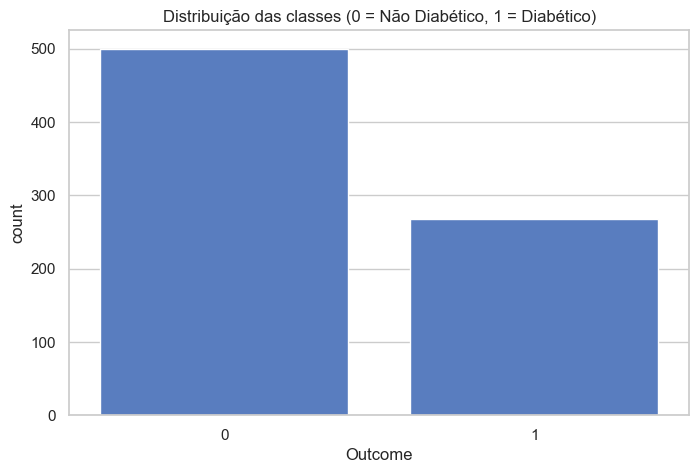


Proporção de classes:


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [ ]:
sns.countplot(x='Outcome', data=dataset)
plt.title("Distribuição das classes (0 = Não Diabético, 1 = Diabético)")
plt.show()

print("\nProporção de classes:")
dataset['Outcome'].value_counts(normalize=True)

### Histograma

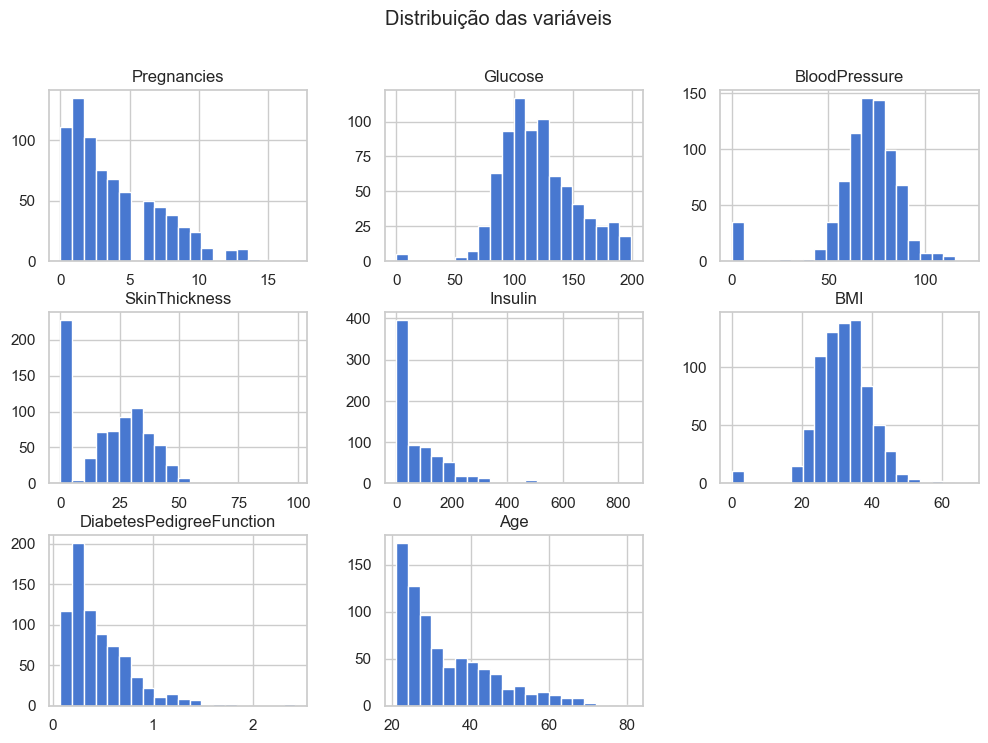

In [ ]:
cols = dataset.columns[:-1]  # todas exceto 'Outcome'
dataset[cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribuição das variáveis")
plt.show()

### Correlação entre variaveis

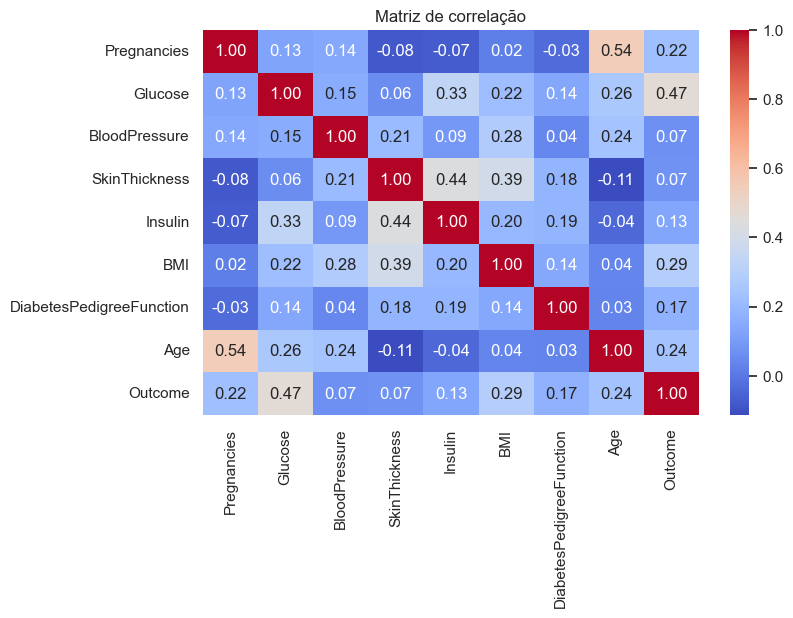

In [ ]:
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlação")
plt.show()

### 🔍 Conclusões do EDA:

#### Valores zero inválidos:
   - Colunas Glucose, BloodPressure, SkinThickness, Insulin e BMI possuem zeros que representam valores ausentes fisiologicamente impossíveis.
   - Solução: substituir 0 por NaN e aplicar imputação (usando KNNImputer).

#### Distribuição das classes:
   - Classe 0 (não diabético): ~65%
   - Classe 1 (diabético): ~35%
   → Desequilíbrio moderado → será compensado com SMOTE após a divisão treino/teste.

#### Correlação: 
   - Glucose e BMI possuem maior correlação com o desfecho (Outcome).
   - BloodPressure e Insulin têm correlação baixa.

### 🎯 Próximos passos:
   - Substituir zeros por NaN
   - Aplicar imputação KNN
   - Balancear com SMOTE
   - Salvar dataset limpo para uso na modelagem
